In [1]:
from image_processor import ImageProcessor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(results):
    annotated_image = results[0].plot()
    # Display the image using Matplotlib
    plt.figure(figsize=(6, 6))  # Adjust the size of the figure if necessary
    plt.imshow(annotated_image)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()

In [3]:
def plot_images(results, processed_image):
    annotated_image = results[0].plot()
    # Plot the two images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create 1 row and 2 columns
    
    # Display the first image
    axes[0].imshow(annotated_image)
    axes[0].axis('off')  # Turn off axis
    axes[0].set_title("bbox face and landmarks")
    
    # Display the second image
    axes[1].imshow(processed_image)
    axes[1].axis('off')  # Turn off axis
    axes[1].set_title("origin image")

In [4]:
processor = ImageProcessor()

--------------


# Test 2.1: Face Detection, no face

In [5]:
with open('images/demo/test_image.jpg', 'rb') as f:
    image_data = f.read()
processed_image = processor.preprocess_image(image_data)
faces, results = processor.detect_faces(processed_image)
assert isinstance(faces, list)
if len(faces) > 0:
    assert 'bbox' in faces[0]
    assert 'confidence' in faces[0]


0: 480x640 (no detections), 305.5ms
Speed: 120.6ms preprocess, 305.5ms inference, 60.8ms postprocess per image at shape (1, 3, 480, 640)


# Test 2.2: Face Detection, one face

In [6]:
with open('images/demo/biden.jpg', 'rb') as f:
    image_data = f.read()
processed_image = processor.preprocess_image(image_data)
faces, results = processor.detect_faces(processed_image)
assert isinstance(faces, list)
if len(faces) > 0:
    assert 'bbox' in faces[0]
    assert 'confidence' in faces[0]


0: 384x640 1 face, 43.9ms
Speed: 1.0ms preprocess, 43.9ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
faces

[{'bbox': (387.0, 52.0, 489.0, 203.0),
  'confidence': 0.8369965,
  'landmarks': {'left_eye': array([     427.77,      116.78,     0.90599], dtype=float32),
   'right_eye': array([     473.52,       117.5,     0.90987], dtype=float32),
   'nose': array([     457.83,      144.23,     0.92323], dtype=float32),
   'left_mouth': array([     428.31,      167.52,      0.9094], dtype=float32),
   'right_mouth': array([     465.89,      168.39,     0.91542], dtype=float32)}}]

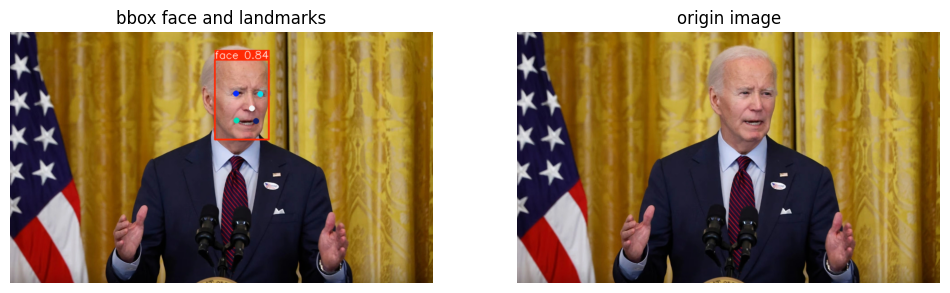

In [8]:
plot_images(results, processed_image)

# Test 2.3: Face Detection, multiple face

In [9]:
with open('images/demo/group_persons.jpg', 'rb') as f:
    image_data = f.read()
processed_image = processor.preprocess_image(image_data)
faces, results = processor.detect_faces(processed_image)
assert isinstance(faces, list)
if len(faces) > 0:
    assert 'bbox' in faces[0]
    assert 'confidence' in faces[0]



0: 384x640 45 faces, 36.9ms
Speed: 2.0ms preprocess, 36.9ms inference, 11.0ms postprocess per image at shape (1, 3, 384, 640)


In [10]:
print(len(faces), faces[1])

45 {'bbox': (293.0, 109.0, 325.0, 151.0), 'confidence': 0.8012416, 'landmarks': {'left_eye': array([     300.31,       123.6,     0.90436], dtype=float32), 'right_eye': array([     316.83,      123.18,     0.91103], dtype=float32), 'nose': array([     309.18,      132.29,     0.90202], dtype=float32), 'left_mouth': array([     302.43,      139.08,     0.89229], dtype=float32), 'right_mouth': array([     315.93,      138.77,     0.89877], dtype=float32)}}


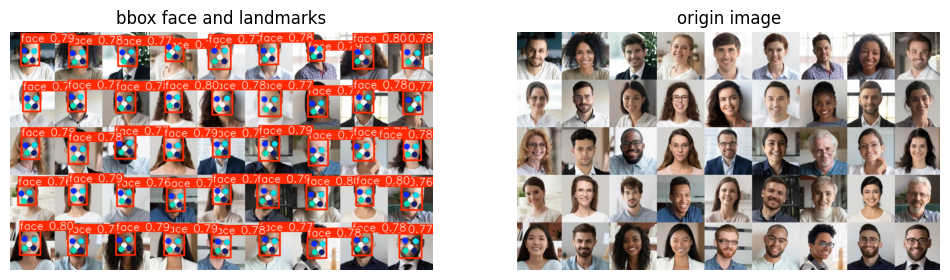

In [11]:
plot_images(results, processed_image)

In [12]:
faces

[{'bbox': (648.0, 20.0, 687.0, 69.0),
  'confidence': 0.8035881,
  'landmarks': {'left_eye': array([     657.59,      37.413,     0.93664], dtype=float32),
   'right_eye': array([        677,      38.899,       0.929], dtype=float32),
   'nose': array([     665.95,      48.852,      0.9235], dtype=float32),
   'left_mouth': array([     657.37,      55.657,     0.91659], dtype=float32),
   'right_mouth': array([     673.16,      56.872,     0.90834], dtype=float32)}},
 {'bbox': (293.0, 109.0, 325.0, 151.0),
  'confidence': 0.8012416,
  'landmarks': {'left_eye': array([     300.31,       123.6,     0.90436], dtype=float32),
   'right_eye': array([     316.83,      123.18,     0.91103], dtype=float32),
   'nose': array([     309.18,      132.29,     0.90202], dtype=float32),
   'left_mouth': array([     302.43,      139.08,     0.89229], dtype=float32),
   'right_mouth': array([     315.93,      138.77,     0.89877], dtype=float32)}},
 {'bbox': (654.0, 289.0, 687.0, 328.0),
  'confidence'